In [18]:
!pip install ipython-sql

  Running setup.py bdist_wheel for prettytable ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
Successfully built prettytable


In [1]:
%load_ext sql

In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [8]:
data = sc.parallelize(
    [('Amber', 22), ('Alfred', 23), ('Skye',4), ('Albert', 12), 
     ('Amber', 9)])

In [21]:
data_from_file = sc.\
    textFile(
        'flight-data/VS14MORT.txt.gz',
        4)

In [22]:
data_from_file.take(2)

['                   1                                          2101  M1087 432311  4M4                2014U7CN                                    I64 238 070   24 0111I64                                                                                                                                                                           01 I64                                                                                                  01  11                                 100 601',
 '                   1                                          2101  M1058 371708  4D3                2014U7CN                                    I250214 062   21 0311I250 61I272 62E669                                                                                                                                                            03 I250 E669 I272                                                                                       01  11                                 100 601']

In [38]:
def extractInformation(row):
    import re
    import numpy as np
    
    selected_indices = [
         2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,
         19,21,22,23,24,25,27,28,29,30,32,33,34,
         36,37,38,39,40,41,42,43,44,45,46,47,48,
         49,50,51,52,53,54,55,56,58,60,61,62,63,
         64,65,66,67,68,69,70,71,72,73,74,75,76,
         77,78,79,81,82,83,84,85,87,89
    ]
    
    record_split = re\
        .compile(
            r'([\s]{19})([0-9]{1})([\s]{40})([0-9\s]{2})([0-9\s]{1})([0-9]{1})([0-9]{2})' + 
            r'([\s]{2})([FM]{1})([0-9]{1})([0-9]{3})([0-9\s]{1})([0-9]{2})([0-9]{2})' + 
            r'([0-9]{2})([0-9\s]{2})([0-9]{1})([SMWDU]{1})([0-9]{1})([\s]{16})([0-9]{4})' +
            r'([YNU]{1})([0-9\s]{1})([BCOU]{1})([YNU]{1})([\s]{34})([0-9\s]{1})([0-9\s]{1})' +
            r'([A-Z0-9\s]{4})([0-9]{3})([\s]{1})([0-9\s]{3})([0-9\s]{3})([0-9\s]{2})([\s]{1})' + 
            r'([0-9\s]{2})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})([A-Z0-9\s]{7})' + 
            r'([A-Z0-9\s]{7})([\s]{36})([A-Z0-9\s]{2})([\s]{1})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})' + 
            r'([A-Z0-9\s]{5})([A-Z0-9\s]{5})([A-Z0-9\s]{5})([\s]{1})([0-9\s]{2})([0-9\s]{1})' + 
            r'([0-9\s]{1})([0-9\s]{1})([0-9\s]{1})([\s]{33})([0-9\s]{3})([0-9\s]{1})([0-9\s]{1})')
        
    try:
        rs = np.array(record_split.split(row))[selected_indices]
    except:
        rs = np.array(['-99'] * len(selected_indices))
    return rs

In [39]:
data_from_file_conv = data_from_file.map(extractInformation)
data_from_file_conv.map(lambda row:row).take(1)

[array(['1', '  ', '2', '1', '01', 'M', '1', '087', ' ', '43', '23', '11',
        '  ', '4', 'M', '4', '2014', 'U', '7', 'C', 'N', ' ', ' ', 'I64 ',
        '238', '070', '   ', '24', '01', '11I64  ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '01',
        'I64  ', '     ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '01', ' ',
        ' ', '1', '1', '100', '6'], 
       dtype='<U40')]

In [40]:
data_2014 = data_from_file_conv.map(lambda row: (row[16],int(row[16])) )

In [41]:
data_2014.take(20)

[('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('-99', -99),
 ('2014', 2014),
 ('2014', 2014),
 ('-99', -99),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014),
 ('2014', 2014)]

In [42]:
data_filtered = data_from_file_conv.filter(
lambda row: row[16] == '2014' and row[21] == '0')

In [35]:
data_filtered.count()

22

In [43]:
data_2014_flat = data_from_file_conv.flatMap(lambda row: (row[16],int(row[16]) + 1) )
data_2014_flat.take(10)

['2014', 2015, '2014', 2015, '2014', 2015, '2014', 2015, '2014', 2015]

In [44]:
distinct_gender = data_from_file_conv.map(
lambda row: row[5]).distinct()

distinct_gender.collect()

['M', 'F', '-99']

In [45]:
rdd1 = sc.parallelize([('a', 1), ('b', 4), ('c',10)])
rdd2 = sc.parallelize([('a', 4), ('a', 1), ('b', '6'), ('d', 15)])

rdd3 = rdd1.leftOuterJoin(rdd2)
rdd3.collect()

[('b', (4, '6')), ('c', (10, None)), ('a', (1, 4)), ('a', (1, 1))]

In [46]:
rdd4 = rdd1.join(rdd2)
rdd4.collect()

[('b', (4, '6')), ('a', (1, 4)), ('a', (1, 1))]

In [47]:
rdd5 = rdd1.intersection(rdd2)
rdd5.collect()

[('a', 1)]

In [49]:
rdd1 = rdd1.repartition(4)
len(rdd1.glom().collect())

4

In [50]:
fraction = 0.1
data_sample = data_from_file_conv.sample(False, fraction, 666)

In [51]:
print('Original dataset: {0}, sample: {1}'\
.format(data_from_file_conv.count(), data_sample.count()))

Original dataset: 2631171, sample: 263247


In [52]:
data_take_sampled = data_from_file_conv.takeSample(False, 1, 667)
data_take_sampled

[array(['2', '17', ' ', '0', '08', 'M', '1', '069', ' ', '39', '19', '09',
        '  ', '1', 'M', '7', '2014', 'U', '7', 'U', 'N', ' ', ' ', 'I251',
        '215', '063', '   ', '21', '06', '11I500 ', '21I251 ', '61I499 ',
        '62I10  ', '63N189 ', '64K761 ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '       ',
        '       ', '       ', '       ', '       ', '       ', '05',
        'I251 ', 'I120 ', 'I499 ', 'I500 ', 'K761 ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '     ',
        '     ', '     ', '     ', '     ', '     ', '     ', '01', ' ',
        ' ', '1', '1', '100', '6'], 
       dtype='<U40')]

In [53]:
rdd1.map(lambda row:row[1]).reduce(lambda x, y: x+y)

15

In [54]:
data_key = sc.parallelize(
    [('a', 4),('b', 3),('c', 2),('a', 8),('d', 2),('b', 1),
     ('d', 3)],4)

In [55]:
data_key.reduceByKey(lambda x,y : x+y).collect()

[('b', 4), ('c', 2), ('a', 12), ('d', 5)]

In [56]:
data_key.collect()

[('a', 4), ('b', 3), ('c', 2), ('a', 8), ('d', 2), ('b', 1), ('d', 3)]

In [59]:
data_key.countByKey()

defaultdict(int, {'a': 2, 'b': 2, 'c': 1, 'd': 2})

In [60]:
data_key.saveAsTextFile(
'data_key.txt')

In [62]:
!ls data_key.txt/

part-00000  part-00001	part-00002  part-00003	_SUCCESS


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [4]:
stringJSONRDD = sc.parallelize(("""
  { "id": "123",
"name": "Katie",
"age": 19,
"eyeColor": "brown"
  }""",
"""{
"id": "234",
"name": "Michael",
"age": 22,
"eyeColor": "green"
  }""", 
"""{
"id": "345",
"name": "Simone",
"age": 23,
"eyeColor": "blue"
  }""")
)

In [5]:
swimmersJSON = spark.read.json(stringJSONRDD)

In [6]:
swimmersJSON.createOrReplaceTempView('swimmersJSON')

In [7]:
swimmersJSON.show(5)

+---+--------+---+-------+
|age|eyeColor| id|   name|
+---+--------+---+-------+
| 19|   brown|123|  Katie|
| 22|   green|234|Michael|
| 23|    blue|345| Simone|
+---+--------+---+-------+



In [12]:
spark.sql('select * from swimmersJSON').collect()

[Row(age=19, eyeColor='brown', id='123', name='Katie'),
 Row(age=22, eyeColor='green', id='234', name='Michael'),
 Row(age=23, eyeColor='blue', id='345', name='Simone')]

In [18]:
#%sql
#select * from swimmersJSON

In [21]:
swimmersJSON.printSchema()

root
 |-- age: long (nullable = true)
 |-- eyeColor: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)



In [23]:
from pyspark.sql.types import *

stringCSVRDD = sc.parallelize([
    (123, 'Katie', 19, 'brown'), 
(234, 'Michael', 22, 'green'), 
(345, 'Simone', 23, 'blue')
])

In [25]:
schema = StructType([
    StructField("id", LongType(), True),    
StructField("name", StringType(), True),
StructField("age", LongType(), True),
StructField("eyeColor", StringType(), True)
])

In [26]:
swimmers = spark.createDataFrame(stringCSVRDD, schema)
swimmers.createOrReplaceTempView("swimmers")

In [27]:
swimmers.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- eyeColor: string (nullable = true)



In [29]:
spark.sql("select * from swimmers").show(2)

+---+-------+---+--------+
| id|   name|age|eyeColor|
+---+-------+---+--------+
|123|  Katie| 19|   brown|
|234|Michael| 22|   green|
+---+-------+---+--------+
only showing top 2 rows



In [30]:
swimmers.count()

3

In [31]:
swimmers.select('id','age').filter('age == 22').show()

+---+---+
| id|age|
+---+---+
|234| 22|
+---+---+



In [32]:
swimmers.select(swimmers.id, swimmers.age).filter(swimmers.age == 22).show()

+---+---+
| id|age|
+---+---+
|234| 22|
+---+---+



In [33]:
swimmers.select('name', 'eyeColor').filter("eyeColor like 'b%'").show()

+------+--------+
|  name|eyeColor|
+------+--------+
| Katie|   brown|
|Simone|    blue|
+------+--------+



In [35]:
!ls flight-data/

airport-codes-na.txt  departuredelays.csv  README.md  VS14MORT.txt.gz


In [37]:
flightPerfFilePaht = "flight-data/departuredelays.csv"
airportsFilePath = "flight-data/airport-codes-na.txt"

airports = spark.read.csv(airportsFilePath, 
                          header='true', 
                          inferSchema= 'true', 
                         sep='\t')
airports.createOrReplaceTempView('airports')

flightPerf = spark.read.csv(flightPerfFilePaht,
                           header = 'true',
                           inferSchema='true')
flightPerf.createOrReplaceTempView('FlightPerformance')

flightPerf.cache()

DataFrame[date: int, delay: int, distance: int, origin: string, destination: string]

In [38]:
spark.sql('select * from airports').show(5)

+----------+-----+-------+----+
|      City|State|Country|IATA|
+----------+-----+-------+----+
|Abbotsford|   BC| Canada| YXX|
|  Aberdeen|   SD|    USA| ABR|
|   Abilene|   TX|    USA| ABI|
|     Akron|   OH|    USA| CAK|
|   Alamosa|   CO|    USA| ALS|
+----------+-----+-------+----+
only showing top 5 rows



In [40]:
spark.sql('select * from FlightPerformance').show(5)

+-------+-----+--------+------+-----------+
|   date|delay|distance|origin|destination|
+-------+-----+--------+------+-----------+
|1011245|    6|     602|   ABE|        ATL|
|1020600|   -8|     369|   ABE|        DTW|
|1021245|   -2|     602|   ABE|        ATL|
|1020605|   -4|     602|   ABE|        ATL|
|1031245|   -4|     602|   ABE|        ATL|
+-------+-----+--------+------+-----------+
only showing top 5 rows



In [43]:
spark.sql("""
select a.City,
f.origin,
sum(f.delay) as Delays
from FlightPerformance f
join airports a 
on a.IATA = f.origin
where a.State = 'WA'
group by a.City, f.origin
order by sum(f.delay) desc
""").show()

+-------+------+------+
|   City|origin|Delays|
+-------+------+------+
|Seattle|   SEA|159086|
|Spokane|   GEG| 12404|
|  Pasco|   PSC|   949|
+-------+------+------+



In [45]:
spark.sql("""
select a.State, sum(f.delay) as Delays
from FlightPerformance f
join airports a
on a.IATA = f.origin
where a.Country = 'USA'
group by a.state
""").show()

+-----+-------+
|State| Delays|
+-----+-------+
|   SC|  80666|
|   AZ| 401793|
|   LA| 199136|
|   MN| 256811|
|   NJ| 452791|
|   OR| 109333|
|   VA|  98016|
| null| 397237|
|   RI|  30760|
|   WY|  15365|
|   KY|  61156|
|   NH|  20474|
|   MI| 366486|
|   NV| 474208|
|   WI| 152311|
|   ID|  22932|
|   CA|1891919|
|   CT|  54662|
|   NE|  59376|
|   MT|  19271|
+-----+-------+
only showing top 20 rows



In [61]:
df = spark.createDataFrame([
        (1, 144.5, 5.9, 33, 'M'),
        (2, 167.2, 5.4, 45, 'M'),
        (3, 124.1, 5.2, 23, 'F'),
        (4, 144.5, 5.9, 33, 'M'),
        (5, 133.2, 5.7, 54, 'F'),
        (3, 124.1, 5.2, 23, 'F'),
        (5, 129.2, 5.3, 42, 'M'),
    ], ['id', 'weight', 'height', 'age', 'gender'])

In [62]:
df.count()

7

In [48]:
df.distinct().count()

6

In [49]:
df.dropDuplicates()
df.show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 144.5|   5.9| 33|     M|
|  2| 167.2|   5.4| 45|     M|
|  3| 124.1|   5.2| 23|     F|
|  4| 144.5|   5.9| 33|     M|
|  5| 133.2|   5.7| 54|     F|
|  3| 124.1|   5.2| 23|     F|
|  5| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [63]:
df.select([ c for c in df.columns if c!= 'id']).distinct().show()

+------+------+---+------+
|weight|height|age|gender|
+------+------+---+------+
| 133.2|   5.7| 54|     F|
| 144.5|   5.9| 33|     M|
| 167.2|   5.4| 45|     M|
| 124.1|   5.2| 23|     F|
| 129.2|   5.3| 42|     M|
+------+------+---+------+



In [64]:
df = df.dropDuplicates(subset=[ 
c for c in df.columns if c!= 'id'])

In [65]:
# calculate total and distinct number of IDs in a single step

import pyspark.sql.functions as fn

df.agg(
fn.count('id').alias('count'),
    fn.countDistinct('id').alias('distinct')
).show()

+-----+--------+
|count|distinct|
+-----+--------+
|    5|       4|
+-----+--------+



In [66]:
df.withColumn('new_id', fn.monotonically_increasing_id()).show()

+---+------+------+---+------+-------------+
| id|weight|height|age|gender|       new_id|
+---+------+------+---+------+-------------+
|  5| 133.2|   5.7| 54|     F|  25769803776|
|  1| 144.5|   5.9| 33|     M| 171798691840|
|  2| 167.2|   5.4| 45|     M| 592705486848|
|  3| 124.1|   5.2| 23|     F|1236950581248|
|  5| 129.2|   5.3| 42|     M|1365799600128|
+---+------+------+---+------+-------------+



In [67]:
df_miss = spark.createDataFrame([         (1, 143.5, 5.6, 28,   'M',  100000),
        (2, 167.2, 5.4, 45,   'M',  None),
        (3, None , 5.2, None, None, None),
        (4, 144.5, 5.9, 33,   'M',  None),
        (5, 133.2, 5.7, 54,   'F',  None),
        (6, 124.1, 5.2, None, 'F',  None),
        (7, 129.2, 5.3, 42,   'M',  76000),
    ], ['id', 'weight', 'height', 'age', 'gender', 'income'])

In [68]:
df_miss.show()

+---+------+------+----+------+------+
| id|weight|height| age|gender|income|
+---+------+------+----+------+------+
|  1| 143.5|   5.6|  28|     M|100000|
|  2| 167.2|   5.4|  45|     M|  null|
|  3|  null|   5.2|null|  null|  null|
|  4| 144.5|   5.9|  33|     M|  null|
|  5| 133.2|   5.7|  54|     F|  null|
|  6| 124.1|   5.2|null|     F|  null|
|  7| 129.2|   5.3|  42|     M| 76000|
+---+------+------+----+------+------+



In [69]:
df_miss.rdd.map(
lambda row: (row['id'], sum([c == None for c in row]))
).collect()

[(1, 0), (2, 1), (3, 4), (4, 1), (5, 1), (6, 2), (7, 0)]

In [71]:
df_miss.agg(*[
    (1- (fn.count(c)/fn.count('*'))).alias(c+'_missing')
    for c in df.columns
]).show()

+----------+------------------+--------------+------------------+------------------+
|id_missing|    weight_missing|height_missing|       age_missing|    gender_missing|
+----------+------------------+--------------+------------------+------------------+
|       0.0|0.1428571428571429|           0.0|0.2857142857142857|0.1428571428571429|
+----------+------------------+--------------+------------------+------------------+



In [73]:
df_miss_no_income = df_miss.select([
    c for c in df_miss.columns if c!= 'income'
])

In [75]:
df_miss_no_income.dropna().show()

+---+------+------+---+------+
| id|weight|height|age|gender|
+---+------+------+---+------+
|  1| 143.5|   5.6| 28|     M|
|  2| 167.2|   5.4| 45|     M|
|  4| 144.5|   5.9| 33|     M|
|  5| 133.2|   5.7| 54|     F|
|  7| 129.2|   5.3| 42|     M|
+---+------+------+---+------+



In [76]:
df_miss_no_income.dropna(thresh= 3).show()

+---+------+------+----+------+
| id|weight|height| age|gender|
+---+------+------+----+------+
|  1| 143.5|   5.6|  28|     M|
|  2| 167.2|   5.4|  45|     M|
|  4| 144.5|   5.9|  33|     M|
|  5| 133.2|   5.7|  54|     F|
|  6| 124.1|   5.2|null|     F|
|  7| 129.2|   5.3|  42|     M|
+---+------+------+----+------+



In [77]:
means = df_miss_no_income.agg(
*[fn.mean(c).alias(c) for c in df_miss_no_income.columns 
 if c != 'gender']
).toPandas().to_dict('records')[0]
means

{'age': 40.399999999999999,
 'height': 5.4714285714285706,
 'id': 4.0,
 'weight': 140.28333333333333}

In [78]:
means['gender'] = 'missing'

df_miss_no_income.fillna(means).show()

+---+-------------+------+---+-------+
| id|       weight|height|age| gender|
+---+-------------+------+---+-------+
|  1|        143.5|   5.6| 28|      M|
|  2|        167.2|   5.4| 45|      M|
|  3|140.283333333|   5.2| 40|missing|
|  4|        144.5|   5.9| 33|      M|
|  5|        133.2|   5.7| 54|      F|
|  6|        124.1|   5.2| 40|      F|
|  7|        129.2|   5.3| 42|      M|
+---+-------------+------+---+-------+



In [79]:
df_outliers = spark.createDataFrame([
        (1, 143.5, 5.3, 28),
        (2, 154.2, 5.5, 45),
        (3, 342.3, 5.1, 99),
        (4, 144.5, 5.5, 33),
        (5, 133.2, 5.4, 54),
        (6, 124.1, 5.1, 21),
        (7, 129.2, 5.3, 42),
    ], ['id', 'weight', 'height', 'age'])

In [80]:
df_outliers.show()

+---+------+------+---+
| id|weight|height|age|
+---+------+------+---+
|  1| 143.5|   5.3| 28|
|  2| 154.2|   5.5| 45|
|  3| 342.3|   5.1| 99|
|  4| 144.5|   5.5| 33|
|  5| 133.2|   5.4| 54|
|  6| 124.1|   5.1| 21|
|  7| 129.2|   5.3| 42|
+---+------+------+---+



In [82]:
cols = ['weight', 'height', 'age']
bounds ={}

for col in cols:
    quantiles = df_outliers.approxQuantile(
    col, [0.25,0.75], 0.5)
    
    IQR = quantiles[1] - quantiles[0]
    
    bounds[col] = [
        quantiles[0] - 1.5 * IQR,
        quantiles[1] + 1.5 * IQR
    ]

In [83]:
bounds

{'age': [-96.0, 216.0],
 'height': [4.499999999999999, 6.1000000000000005],
 'weight': [-203.20000000000002, 669.6]}

In [8]:
!cat ccFraud.csv  | head











cat: write error: Broken pipe


In [3]:
import pyspark.sql.types as tp
import pyspark.sql.functions as fn

In [4]:
fraud = sc.textFile('ccFraud.csv')
header = fraud.first()

fraud = fraud \
        .filter(lambda row: row !=header) \
    .map(lambda row: [int(x) for x in row.split(',')])
    

In [5]:
fields = [
    *[tp.StructField( h.strip('"'), tp.IntegerType(), True) 
    for h in header.split(',')]
]
schema = tp.StructType(fields)

In [6]:
fraud_df = spark.createDataFrame(fraud, schema)

In [7]:
fraud_df.printSchema()

root
 |-- custID: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- cardholder: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- numTrans: integer (nullable = true)
 |-- numIntlTrans: integer (nullable = true)
 |-- creditLine: integer (nullable = true)
 |-- fraudRisk: integer (nullable = true)



In [22]:
fraud_df.groupBy('gender').count().show()

+------+-------+
|gender|  count|
+------+-------+
|     1|6178231|
|     2|3821769|
+------+-------+



In [19]:
neumerical = ['balance','numIntlTrans','numTrans']

In [23]:


desc = fraud_df.describe(neumerical)
desc.show()

+-------+-----------------+-----------------+------------------+
|summary|          balance|     numIntlTrans|          numTrans|
+-------+-----------------+-----------------+------------------+
|  count|         10000000|         10000000|          10000000|
|   mean|     4109.9199193|        4.0471899|        28.9351871|
| stddev|3996.847309737258|8.602970115863904|26.553781024523122|
|    min|                0|                0|                 0|
|    max|            41485|               60|               100|
+-------+-----------------+-----------------+------------------+



In [24]:
fraud_df.agg({'balance':'skewness'}).show()

+------------------+
| skewness(balance)|
+------------------+
|1.1818315552993839|
+------------------+



In [25]:
fraud_df.agg({'balance':'max'}).show()

+------------+
|max(balance)|
+------------+
|       41485|
+------------+



In [26]:
fraud_df.corr('balance','numTrans')

0.0004452314017265388

In [29]:
#create correlation matrix

n_numerical = len(neumerical)

corr = []

for i in range(0, n_numerical):
    temp = [None] * i
    
    for j in range(i, n_numerical):
        temp.append(fraud_df.corr(neumerical[i], neumerical[j]))
    corr.append(temp)

KeyboardInterrupt: 

In [8]:
fraud_df.show(2)

+------+------+-----+----------+-------+--------+------------+----------+---------+
|custID|gender|state|cardholder|balance|numTrans|numIntlTrans|creditLine|fraudRisk|
+------+------+-----+----------+-------+--------+------------+----------+---------+
|     1|     1|   35|         1|   3000|       4|          14|         2|        0|
|     2|     2|    2|         1|      0|       9|           0|        18|        0|
+------+------+-----+----------+-------+--------+------------+----------+---------+
only showing top 2 rows



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#import bokeh.charts as chrt
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [13]:
hists = fraud_df.select('balance').rdd.flatMap(
lambda row:row
).histogram(20)

In [14]:
hists

([0.0,
  2074.25,
  4148.5,
  6222.75,
  8297.0,
  10371.25,
  12445.5,
  14519.75,
  16594.0,
  18668.25,
  20742.5,
  22816.75,
  24891.0,
  26965.25,
  29039.5,
  31113.75,
  33188.0,
  35262.25,
  37336.5,
  39410.75,
  41485],
 [3640021,
  2258778,
  1718633,
  1035019,
  601524,
  343461,
  192766,
  104486,
  54517,
  27570,
  13117,
  5805,
  2650,
  1103,
  358,
  127,
  45,
  15,
  1,
  4])

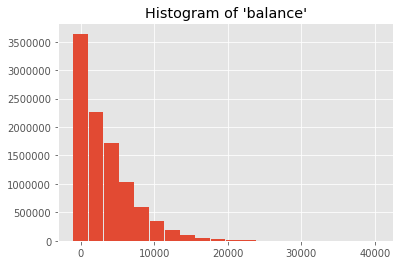

In [16]:
data = {
    'bins':hists[0][:-1],
    'freq':hists[1]
}
plt.bar(data['bins'] , data['freq'], width=2000)
plt.title('Histogram of \'balance\'')


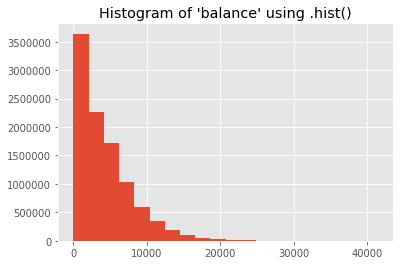

In [17]:
data_driver = {
    'obs': fraud_df.select('balance').rdd.flatMap(
        lambda row: row
    ).collect()
}
plt.hist(data_driver['obs'], bins=20)
plt.title('Histogram of \'balance\' using .hist()')

In [20]:
data_sample = fraud_df.sampleBy(
    'gender', {1:0.0002, 2:0.0002}
).select(neumerical)

In [27]:
data_sample.select('balance').rdd.flatMap(lambda row:row).take(10)

[5222, 3000, 7336, 2422, 0, 0, 1999, 9000, 3000, 0]

In [ ]:
data_multi = dict([
    (elem, data_sample.select(elem).rdd \
    .flatMap(lambda row:row).collect())
    for elem in neumerical
])


In [62]:
# mllib tutorial

import pyspark.sql.types as typ

labels = [
    ('INFANT_ALIVE_AT_REPORT', typ.StringType()),
    ('BIRTH_YEAR', typ.IntegerType()),
    ('BIRTH_MONTH', typ.IntegerType()),
    ('BIRTH_PLACE', typ.StringType()),
    ('MOTHER_AGE_YEARS', typ.IntegerType()),
    ('MOTHER_RACE_6CODE', typ.StringType()),
    ('MOTHER_EDUCATION', typ.StringType()),
    ('FATHER_COMBINED_AGE', typ.IntegerType()),
    ('FATHER_EDUCATION', typ.StringType()),
    ('MONTH_PRECARE_RECODE', typ.StringType()),
    ('CIG_BEFORE', typ.IntegerType()),
    ('CIG_1_TRI', typ.IntegerType()),
    ('CIG_2_TRI', typ.IntegerType()),
    ('CIG_3_TRI', typ.IntegerType()),
    ('MOTHER_HEIGHT_IN', typ.IntegerType()),
    ('MOTHER_BMI_RECODE', typ.IntegerType()),
    ('MOTHER_PRE_WEIGHT', typ.IntegerType()),
    ('MOTHER_DELIVERY_WEIGHT', typ.IntegerType()),
    ('MOTHER_WEIGHT_GAIN', typ.IntegerType()),
    ('DIABETES_PRE', typ.StringType()),
    ('DIABETES_GEST', typ.StringType()),
    ('HYP_TENS_PRE', typ.StringType()),
    ('HYP_TENS_GEST', typ.StringType()),
    ('PREV_BIRTH_PRETERM', typ.StringType()),
    ('NO_RISK', typ.StringType()),
    ('NO_INFECTIONS_REPORTED', typ.StringType()),
    ('LABOR_IND', typ.StringType()),
    ('LABOR_AUGM', typ.StringType()),
    ('STEROIDS', typ.StringType()),
    ('ANTIBIOTICS', typ.StringType()),
    ('ANESTHESIA', typ.StringType()),
    ('DELIV_METHOD_RECODE_COMB', typ.StringType()),
    ('ATTENDANT_BIRTH', typ.StringType()),
    ('APGAR_5', typ.IntegerType()),
    ('APGAR_5_RECODE', typ.StringType()),
    ('APGAR_10', typ.IntegerType()),
    ('APGAR_10_RECODE', typ.StringType()),
    ('INFANT_SEX', typ.StringType()),
    ('OBSTETRIC_GESTATION_WEEKS', typ.IntegerType()),
    ('INFANT_WEIGHT_GRAMS', typ.IntegerType()),
    ('INFANT_ASSIST_VENTI', typ.StringType()),
    ('INFANT_ASSIST_VENTI_6HRS', typ.StringType()),
    ('INFANT_NICU_ADMISSION', typ.StringType()),
    ('INFANT_SURFACANT', typ.StringType()),
    ('INFANT_ANTIBIOTICS', typ.StringType()),
    ('INFANT_SEIZURES', typ.StringType()),
    ('INFANT_NO_ABNORMALITIES', typ.StringType()),
    ('INFANT_ANCEPHALY', typ.StringType()),
    ('INFANT_MENINGOMYELOCELE', typ.StringType()),
    ('INFANT_LIMB_REDUCTION', typ.StringType()),
    ('INFANT_DOWN_SYNDROME', typ.StringType()),
    ('INFANT_SUSPECTED_CHROMOSOMAL_DISORDER', typ.StringType()),
    ('INFANT_NO_CONGENITAL_ANOMALIES_CHECKED', typ.StringType()),
    ('INFANT_BREASTFED', typ.StringType())
]

schema = tp.StructType([
    tp.StructField(e[0], e[1], True) for e in labels
])


In [63]:
births = spark.read.csv('births_train.csv.gz',
                       header = True,
                       schema=schema)

In [64]:
births.select(['INFANT_ALIVE_AT_REPORT','BIRTH_PLACE','MOTHER_AGE_YEARS']).show(5)

+----------------------+-----------+----------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|
+----------------------+-----------+----------------+
|                     N|          1|              29|
|                     N|          1|              22|
|                     N|          1|              38|
|                     N|          1|              39|
|                     N|          1|              18|
+----------------------+-----------+----------------+
only showing top 5 rows



In [65]:
recode_dictionary = {
    'YNU':{
        'Y':1,
        'N':0,
        'U':0
    }
}

In [66]:
selected_features = [
    'INFANT_ALIVE_AT_REPORT', 
    'BIRTH_PLACE', 
    'MOTHER_AGE_YEARS', 
    'FATHER_COMBINED_AGE', 
    'CIG_BEFORE', 
    'CIG_1_TRI', 
    'CIG_2_TRI', 
    'CIG_3_TRI', 
    'MOTHER_HEIGHT_IN', 
    'MOTHER_PRE_WEIGHT', 
    'MOTHER_DELIVERY_WEIGHT', 
    'MOTHER_WEIGHT_GAIN', 
    'DIABETES_PRE', 
    'DIABETES_GEST', 
    'HYP_TENS_PRE', 
    'HYP_TENS_GEST', 
    'PREV_BIRTH_PRETERM'
]
births_trimmed = births.select(selected_features)

In [67]:
births.printSchema()

root
 |-- INFANT_ALIVE_AT_REPORT: string (nullable = true)
 |-- BIRTH_YEAR: integer (nullable = true)
 |-- BIRTH_MONTH: integer (nullable = true)
 |-- BIRTH_PLACE: string (nullable = true)
 |-- MOTHER_AGE_YEARS: integer (nullable = true)
 |-- MOTHER_RACE_6CODE: string (nullable = true)
 |-- MOTHER_EDUCATION: string (nullable = true)
 |-- FATHER_COMBINED_AGE: integer (nullable = true)
 |-- FATHER_EDUCATION: string (nullable = true)
 |-- MONTH_PRECARE_RECODE: string (nullable = true)
 |-- CIG_BEFORE: integer (nullable = true)
 |-- CIG_1_TRI: integer (nullable = true)
 |-- CIG_2_TRI: integer (nullable = true)
 |-- CIG_3_TRI: integer (nullable = true)
 |-- MOTHER_HEIGHT_IN: integer (nullable = true)
 |-- MOTHER_BMI_RECODE: integer (nullable = true)
 |-- MOTHER_PRE_WEIGHT: integer (nullable = true)
 |-- MOTHER_DELIVERY_WEIGHT: integer (nullable = true)
 |-- MOTHER_WEIGHT_GAIN: integer (nullable = true)
 |-- DIABETES_PRE: string (nullable = true)
 |-- DIABETES_GEST: string (nullable = true)


In [68]:
import pyspark.sql.functions as func

def recode(col, key):
    return recode_dictionary[key][col]

def correct_cig(feat):
    return func \
            .when(func.col(feat) != 99, func.col(feat) )\
            .otherwise(0)
rec_integer = func.udf(recode, tp.IntegerType())

In [69]:
births_transformed = births_trimmed \
    .withColumn('CIG_BEFORE' , correct_cig('CIG_BEFORE'))\
    .withColumn('CIG_1_TRI' , correct_cig('CIG_1_TRI'))\
    .withColumn('CIG_2_TRI' , correct_cig('CIG_2_TRI'))\
    .withColumn('CIG_3_TRI' , correct_cig('CIG_3_TRI'))

In [71]:
births_trimmed.printSchema()

root
 |-- INFANT_ALIVE_AT_REPORT: string (nullable = true)
 |-- BIRTH_PLACE: string (nullable = true)
 |-- MOTHER_AGE_YEARS: integer (nullable = true)
 |-- FATHER_COMBINED_AGE: integer (nullable = true)
 |-- CIG_BEFORE: integer (nullable = true)
 |-- CIG_1_TRI: integer (nullable = true)
 |-- CIG_2_TRI: integer (nullable = true)
 |-- CIG_3_TRI: integer (nullable = true)
 |-- MOTHER_HEIGHT_IN: integer (nullable = true)
 |-- MOTHER_PRE_WEIGHT: integer (nullable = true)
 |-- MOTHER_DELIVERY_WEIGHT: integer (nullable = true)
 |-- MOTHER_WEIGHT_GAIN: integer (nullable = true)
 |-- DIABETES_PRE: string (nullable = true)
 |-- DIABETES_GEST: string (nullable = true)
 |-- HYP_TENS_PRE: string (nullable = true)
 |-- HYP_TENS_GEST: string (nullable = true)
 |-- PREV_BIRTH_PRETERM: string (nullable = true)



In [72]:
births_transformed.printSchema()

root
 |-- INFANT_ALIVE_AT_REPORT: string (nullable = true)
 |-- BIRTH_PLACE: string (nullable = true)
 |-- MOTHER_AGE_YEARS: integer (nullable = true)
 |-- FATHER_COMBINED_AGE: integer (nullable = true)
 |-- CIG_BEFORE: integer (nullable = true)
 |-- CIG_1_TRI: integer (nullable = true)
 |-- CIG_2_TRI: integer (nullable = true)
 |-- CIG_3_TRI: integer (nullable = true)
 |-- MOTHER_HEIGHT_IN: integer (nullable = true)
 |-- MOTHER_PRE_WEIGHT: integer (nullable = true)
 |-- MOTHER_DELIVERY_WEIGHT: integer (nullable = true)
 |-- MOTHER_WEIGHT_GAIN: integer (nullable = true)
 |-- DIABETES_PRE: string (nullable = true)
 |-- DIABETES_GEST: string (nullable = true)
 |-- HYP_TENS_PRE: string (nullable = true)
 |-- HYP_TENS_GEST: string (nullable = true)
 |-- PREV_BIRTH_PRETERM: string (nullable = true)



In [73]:
cols = [(col.name, col.dataType) for col in births_trimmed.schema]

In [74]:
births.select(s[0])\
            .distinct()\
            .rdd\
            .map(lambda row: row[0])\
            .collect()

['Y', 'U', 'N']

In [75]:
cols = [(col.name, col.dataType) for col in births_trimmed.schema]
YNU_cols = []
for i, s in enumerate(cols):
    if s[1] == tp.StringType():
        dis = births.select(s[0]) \
            .distinct() \
            .rdd \
            .map(lambda row: row[0]) \
            .collect() 
        if 'Y' in dis:
            YNU_cols.append(s[0])

In [76]:
YNU_cols

['INFANT_ALIVE_AT_REPORT',
 'DIABETES_PRE',
 'DIABETES_GEST',
 'HYP_TENS_PRE',
 'HYP_TENS_GEST',
 'PREV_BIRTH_PRETERM']

In [77]:
births.select([
    'INFANT_NICU_ADMISSION',
    rec_integer(
    'INFANT_NICU_ADMISSION', func.lit('YNU'))\
    .alias('INFANT_NICU_ADMISSION_RECODE')
]).take(5)

[Row(INFANT_NICU_ADMISSION='Y', INFANT_NICU_ADMISSION_RECODE=1),
 Row(INFANT_NICU_ADMISSION='Y', INFANT_NICU_ADMISSION_RECODE=1),
 Row(INFANT_NICU_ADMISSION='U', INFANT_NICU_ADMISSION_RECODE=0),
 Row(INFANT_NICU_ADMISSION='N', INFANT_NICU_ADMISSION_RECODE=0),
 Row(INFANT_NICU_ADMISSION='U', INFANT_NICU_ADMISSION_RECODE=0)]

In [78]:
exprs_YNU = [
    rec_integer(x, func.lit('YNU')).alias(x) 
    if x in YNU_cols 
    else x 
    for x in births_transformed.columns
]
births_transformed = births_transformed.select(exprs_YNU)

In [80]:
exprs_YNU

[Column<b'recode(INFANT_ALIVE_AT_REPORT, YNU) AS `INFANT_ALIVE_AT_REPORT`'>,
 'BIRTH_PLACE',
 'MOTHER_AGE_YEARS',
 'FATHER_COMBINED_AGE',
 'CIG_BEFORE',
 'CIG_1_TRI',
 'CIG_2_TRI',
 'CIG_3_TRI',
 'MOTHER_HEIGHT_IN',
 'MOTHER_PRE_WEIGHT',
 'MOTHER_DELIVERY_WEIGHT',
 'MOTHER_WEIGHT_GAIN',
 Column<b'recode(DIABETES_PRE, YNU) AS `DIABETES_PRE`'>,
 Column<b'recode(DIABETES_GEST, YNU) AS `DIABETES_GEST`'>,
 Column<b'recode(HYP_TENS_PRE, YNU) AS `HYP_TENS_PRE`'>,
 Column<b'recode(HYP_TENS_GEST, YNU) AS `HYP_TENS_GEST`'>,
 Column<b'recode(PREV_BIRTH_PRETERM, YNU) AS `PREV_BIRTH_PRETERM`'>]

In [81]:
births_transformed.select(YNU_cols[-5:]).show(5)

+------------+-------------+------------+-------------+------------------+
|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|
+------------+-------------+------------+-------------+------------------+
|           0|            0|           0|            0|                 0|
|           0|            0|           0|            0|                 0|
|           0|            0|           0|            0|                 0|
|           0|            0|           0|            0|                 1|
|           0|            0|           0|            0|                 0|
+------------+-------------+------------+-------------+------------------+
only showing top 5 rows



In [83]:
#desceriptive statistics for neumerical cols

import pyspark.mllib.stat as st
import numpy as np

numeric_cols = ['MOTHER_AGE_YEARS','FATHER_COMBINED_AGE',
                'CIG_BEFORE','CIG_1_TRI','CIG_2_TRI','CIG_3_TRI',
                'MOTHER_HEIGHT_IN','MOTHER_PRE_WEIGHT',
                'MOTHER_DELIVERY_WEIGHT','MOTHER_WEIGHT_GAIN'
               ]

numeric_rdd = births_transformed\
                    .select(numeric_cols)\
                    .rdd\
                    .map(lambda row: [e for e in row])
mllib_stats = st.Statistics.colStats(numeric_rdd)

for col, m , v in zip(numeric_cols,
                     mllib_stats.mean(),
                     mllib_stats.variance()):
    print('{0}:\t{1:2f} \t {2:2f}'.format(col, m, np.sqrt(v)))

MOTHER_AGE_YEARS:	28.298422 	 6.078526
FATHER_COMBINED_AGE:	44.549759 	 27.550495
CIG_BEFORE:	1.427987 	 5.181486
CIG_1_TRI:	0.905743 	 3.825772
CIG_2_TRI:	0.702481 	 3.311340
CIG_3_TRI:	0.580026 	 3.109682
MOTHER_HEIGHT_IN:	65.120892 	 6.451979
MOTHER_PRE_WEIGHT:	214.498404 	 210.208633
MOTHER_DELIVERY_WEIGHT:	223.626098 	 180.014057
MOTHER_WEIGHT_GAIN:	30.739968 	 26.225580


In [85]:
#descriptive sttistics for categorical cols
categorical_cols = [e for e in births_transformed.columns 
                    if e not in numeric_cols]

categorical_rdd = births_transformed\
                .select(categorical_cols)\
                .rdd\
                .map(lambda row: [e for e in row])
            
for i , col in enumerate(categorical_cols):
    agg = categorical_rdd\
            .groupBy(lambda row:row[i])\
            .map(lambda row: (row[0], len(row[1])))
    print(col, sorted(agg.collect(), 
                      key=lambda el: el[1], 
                      reverse=True))  


INFANT_ALIVE_AT_REPORT [(1, 23349), (0, 22080)]
BIRTH_PLACE [('1', 44558), ('4', 327), ('3', 224), ('2', 136), ('7', 91), ('5', 74), ('6', 11), ('9', 8)]
DIABETES_PRE [(0, 44881), (1, 548)]
DIABETES_GEST [(0, 43451), (1, 1978)]
HYP_TENS_PRE [(0, 44348), (1, 1081)]
HYP_TENS_GEST [(0, 43302), (1, 2127)]
PREV_BIRTH_PRETERM [(0, 43088), (1, 2341)]


In [101]:
corrs = st.Statistics.corr(numeric_rdd)
for i, el in enumerate(corrs > 0.5):
    correlated = [
        (numeric_cols[j], corrs[i][j]) 
        for j, e in enumerate(el) 
        if e == 1.0 and j != i]
    if len(correlated) > 0:
        for e in correlated:
            print('{0}-to-{1}: {2:.2f}' \
                  .format(numeric_cols[i], e[0], e[1]))

CIG_BEFORE-to-CIG_1_TRI: 0.83
CIG_BEFORE-to-CIG_2_TRI: 0.72
CIG_BEFORE-to-CIG_3_TRI: 0.62
CIG_1_TRI-to-CIG_BEFORE: 0.83
CIG_1_TRI-to-CIG_2_TRI: 0.87
CIG_1_TRI-to-CIG_3_TRI: 0.76
CIG_2_TRI-to-CIG_BEFORE: 0.72
CIG_2_TRI-to-CIG_1_TRI: 0.87
CIG_2_TRI-to-CIG_3_TRI: 0.89
CIG_3_TRI-to-CIG_BEFORE: 0.62
CIG_3_TRI-to-CIG_1_TRI: 0.76
CIG_3_TRI-to-CIG_2_TRI: 0.89
MOTHER_PRE_WEIGHT-to-MOTHER_DELIVERY_WEIGHT: 0.54
MOTHER_PRE_WEIGHT-to-MOTHER_WEIGHT_GAIN: 0.65
MOTHER_DELIVERY_WEIGHT-to-MOTHER_PRE_WEIGHT: 0.54
MOTHER_DELIVERY_WEIGHT-to-MOTHER_WEIGHT_GAIN: 0.60
MOTHER_WEIGHT_GAIN-to-MOTHER_PRE_WEIGHT: 0.65
MOTHER_WEIGHT_GAIN-to-MOTHER_DELIVERY_WEIGHT: 0.60


In [103]:
features_to_keep = [
    'INFANT_ALIVE_AT_REPORT', 
    'BIRTH_PLACE', 
    'MOTHER_AGE_YEARS', 
    'FATHER_COMBINED_AGE', 
    'CIG_1_TRI', 
    'MOTHER_HEIGHT_IN', 
    'MOTHER_PRE_WEIGHT', 
    'DIABETES_PRE', 
    'DIABETES_GEST', 
    'HYP_TENS_PRE', 
    'HYP_TENS_GEST', 
    'PREV_BIRTH_PRETERM'
]

births_transformed = births_transformed.select([
    e for e in features_to_keep
])

In [104]:
births_transformed.show(5)

+----------------------+-----------+----------------+-------------------+---------+----------------+-----------------+------------+-------------+------------+-------------+------------------+
|INFANT_ALIVE_AT_REPORT|BIRTH_PLACE|MOTHER_AGE_YEARS|FATHER_COMBINED_AGE|CIG_1_TRI|MOTHER_HEIGHT_IN|MOTHER_PRE_WEIGHT|DIABETES_PRE|DIABETES_GEST|HYP_TENS_PRE|HYP_TENS_GEST|PREV_BIRTH_PRETERM|
+----------------------+-----------+----------------+-------------------+---------+----------------+-----------------+------------+-------------+------------+-------------+------------------+
|                     0|          1|              29|                 99|        0|              99|              999|           0|            0|           0|            0|                 0|
|                     0|          1|              22|                 29|        0|              65|              180|           0|            0|           0|            0|                 0|
|                     0|          1|    

In [105]:
import pyspark.mllib.linalg as ln

categorical_cols

['INFANT_ALIVE_AT_REPORT',
 'BIRTH_PLACE',
 'DIABETES_PRE',
 'DIABETES_GEST',
 'HYP_TENS_PRE',
 'HYP_TENS_GEST',
 'PREV_BIRTH_PRETERM']

In [106]:
# run chiSq Test 
import pyspark.mllib.linalg as ln
for cat in categorical_cols[1:]:
    agg = births_transformed \
        .groupby('INFANT_ALIVE_AT_REPORT') \
        .pivot(cat) \
        .count()    
    agg_rdd = agg \
        .rdd \
        .map(lambda row: (row[1:])) \
        .flatMap(lambda row: 
                 [0 if e == None else e for e in row]) \
        .collect()
    row_length = len(agg.collect()[0]) - 1
    agg = ln.Matrices.dense(row_length, 2, agg_rdd)
    
    test = st.Statistics.chiSqTest(agg)
    print(cat, round(test.pValue, 4))

BIRTH_PLACE 0.0
DIABETES_PRE 0.0
DIABETES_GEST 0.0
HYP_TENS_PRE 0.0
HYP_TENS_GEST 0.0
PREV_BIRTH_PRETERM 0.0


In [114]:
import pyspark.mllib.feature as ft
import pyspark.mllib.regression as reg
hashing= ft.HashingTF(7)

births_hashed = births_transformed\
                .rdd \
                .map(lambda row:[
                    list(hashing.transform(row[1]).toArray())
                    if col == 'BIRTH_PLACE'
                    else row[i]
                    for i, col 
                    in enumerate(features_to_keep)
                ])\
                .map(lambda row: [[e] if type(e) == int else e
                                 for e in row])\
                .map(lambda row: [item for sublist in row
                                 for item in sublist])\
                .map(lambda row:reg.LabeledPoint(
                row[0],
                ln.Vectors.dense(row[1:]))
                    )

In [116]:
births_transformed.take(5)

[Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='1', MOTHER_AGE_YEARS=29, FATHER_COMBINED_AGE=99, CIG_1_TRI=0, MOTHER_HEIGHT_IN=99, MOTHER_PRE_WEIGHT=999, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=0),
 Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='1', MOTHER_AGE_YEARS=22, FATHER_COMBINED_AGE=29, CIG_1_TRI=0, MOTHER_HEIGHT_IN=65, MOTHER_PRE_WEIGHT=180, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=0),
 Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='1', MOTHER_AGE_YEARS=38, FATHER_COMBINED_AGE=40, CIG_1_TRI=0, MOTHER_HEIGHT_IN=63, MOTHER_PRE_WEIGHT=155, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=0),
 Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='1', MOTHER_AGE_YEARS=39, FATHER_COMBINED_AGE=42, CIG_1_TRI=0, MOTHER_HEIGHT_IN=60, MOTHER_PRE_WEIGHT=128, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=1),
 Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE='

In [115]:
births_hashed.take(5)

[LabeledPoint(0.0, [1.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,99.0,0.0,99.0,999.0,0.0,0.0,0.0,0.0,0.0]),
 LabeledPoint(0.0, [1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,29.0,0.0,65.0,180.0,0.0,0.0,0.0,0.0,0.0]),
 LabeledPoint(0.0, [1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,40.0,0.0,63.0,155.0,0.0,0.0,0.0,0.0,0.0]),
 LabeledPoint(0.0, [1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,42.0,0.0,60.0,128.0,0.0,0.0,0.0,0.0,1.0]),
 LabeledPoint(0.0, [1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,99.0,4.0,61.0,110.0,0.0,0.0,0.0,0.0,0.0])]

In [117]:
births_train, births_test = births_hashed.randomSplit([0.6, 0.4])

In [ ]:
from pyspark.mllib.classification \
    import LogisticRegressionWithLBGS
    LT_Model = LogisticRegressionWithLBFGS \
            .train(births_train, iterations=10)